# Cross Validation

1. Ecrivez une méthode qui prend en entrée un jeu de données $X,y$ et un entier $k$ $(1<k<|X|)$, et retourne un partition du jeu de données en k partitions de tailles équivalentes.

2. Testez cette méthode sur le jeu de données IRIS pour trouver le bon $C$ qu'un SVM linéaire doit prendre en entrée. Pour cela:

  2.1 : Effectuez un grid search pour les les valeurs de $C$ indiquées. Répétez l'opération 50 fois et gardez en mémoire  les 50*$k$ accuracy (on utilisera $k$=10)

  2.2 : Représentez graphiquement les résultats (accurarcy moyenne et écart-type) pour chaque $C$. Utilisez le fonction de pyplot : plt.errorbar()

  

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


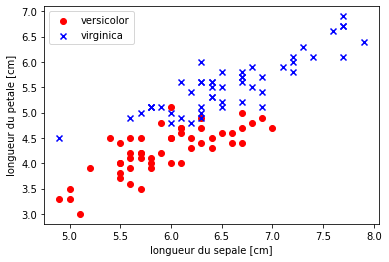

In [ ]:
import os
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support and len(model.support_vectors_<1):
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='black',alpha=0.3);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


def plot_decision_regions_svm(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #plot_svc_decision_boundary(classifier,x1_min,x1_max)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    plot_svc_decision_function(classifier)

    
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

# selectionn de setosa et versicolor
y = df.iloc[50:150, 4].values

# precedemment, on s'interessait à deux autres classes
#y = np.where(y == 'Iris-setosa', -1, 1)
y = np.where(y == 'Iris-versicolor', -1, 1)

# extraction de la longueur du sepale length et de la longueur du petale
X = df.iloc[50:150, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('longueur du sepale [cm]')
plt.ylabel('longueur du petale [cm]')
plt.legend(loc='upper left')

plt.show()

In [ ]:
def kf_separator(X,y,k=10,seed=0):
 






(9, 2)
(9, 2)


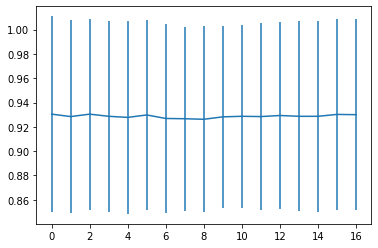

In [ ]:
Cs=[1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,200,500]

def cross_valider(X,y,clfs,k=10,num_xp=1):
 




##METHODE A NOYAUX
De la même manière que précedemment, tentez d'identifiez le bon couple de paramètres $(C,\sigma)$ pour un classifieur à noyau gaussien.